# IMPORTS

Now we introduce you to one of the most important libraries for data science and machine learning for python : **numpy**  
NumPy provides an efficient storage and better way handling of the data for mathematical operations using simple API’s, the benefit of which far out-weights writing your own.

In [1]:
import numpy as np

## SPEED ...
Numpy arrays are densely packed arrays of homogeneous type unlike array of objects as in Python list. So, you get the benefits of locality of reference and it makes your code faster (as much as around 20x with two array of $10^7$ elements) Following code snippets will show you it happening.

### Functions to compare *numpy* and *regular python* way

In [2]:
# List_add is a function that adds a two list of given size
def list_add(size):
    added_python_list=[]
    python_list1 = [i for i in range(size)]
    python_list2 = [2*i for i in range(size)]
    for i in range(len(python_list1)):
        added_python_list.append(python_list1[i] + python_list2[i])

# np_add adds two numpy arrays of a given size
def np_add(size):
    numpy_array1 = np.arange(0,size,1)
    numpy_array2 = 2*numpy_array1
    added_numpy_array = numpy_array1 + numpy_array2

### Function to return a list of time intervals for sizes varying from $2^{10}$ to $2^{24}$

In [3]:
# time is a library used to create time variables
import time

# time_list is a function to return a numpy array that appends time taken by function calls
start,end=10,25
def time_list(function,start=start,end=end):
    time_taken=[]
    for i in range(start,end):
        start=time.time()
        function(2**i)
        time_taken.append(time.time()-start)
    return (np.asarray(time_taken))*1000

### Notice the difference in time intervals for a range of ~$10^8$ elements

In [4]:
print("start : ",2**start)
print("end : ",2**(end-1))
list_time=time_list(list_add)
np_time  =time_list(np_add)
print("time for size of {} =\n\t\t List : {} ms\n\t\t Numpy: {} ms".format(2**(end-1),int(list_time[-1]),int(np_time[-1])))

start :  1024
end :  16777216
time for size of 16777216 =
		 List : 3370 ms
		 Numpy: 198 ms


### Plot of time intervals Numpy vs Python List

Plotting techniques using matplotlib and seaborn will be explained later

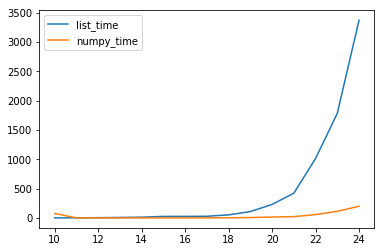

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#seaborn.matplotlib are library used for making good visual plots
sns.lineplot(np.arange(start,end),list_time,label="list_time")
sns.lineplot(np.arange(start,end),np_time,label="numpy_time")

## MEMORY ...
The NumPy arrays takes significantly less amount of memory as compared to python lists. It also provides a mechanism of specifying the data types of the contents, which allows further optimisation of the code.

In [6]:
import numpy as np
import sys

py_arr = [1,2,3,4,5,6]
numpy_arr = np.array([1,2,3,4,5,6])

sizeof_py_arr = sys.getsizeof(1) * len(py_arr)           # Size = 168
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size   # Size = 48
print("Python List consumes",sizeof_py_arr,"\nWhile NumPy array consumes",sizeof_numpy_arr)

Python List consumes 168 
While NumPy array consumes 48


This is very efficient considering you generally deal with arrays of millions of elements.   
It’s possible to do further optimisation on the NumPy arrays if we know the maximum number of individual data we’re planning to have. Suppose you know that your data is in form of integers, all less than 255 (NumPy initially assumes 8bytes) you can store them all in one byte = 8bits

In [7]:
py_arr = [1,2,3,4,5,6]
sizeof_py_arr = sys.getsizeof(1) * len(py_arr)           # Size = 168

numpy_arr = np.array([1,2,3,4,5,6], dtype = np.int8)
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size   # Size = 6
print("Python List consumes",sizeof_py_arr,"\nWhile NumPy array consumes",sizeof_numpy_arr)

Python List consumes 168 
While NumPy array consumes 6


Also NumPy features a lot of other features like mean,median,where,count nonzero that help you to understand your data better and faster. Visit the documentaion at :[Documentation](https://docs.scipy.org/doc/numpy/).  
Refer to the bottom of this page for other sources : [Week1 Resources](https://github.com/someshsingh22/CTE-Intro-To-Machine-Learning/tree/master/Week-1%20Getting%20Started)

### Read Alex's Answer, infact read all his answer to understand Python in depth!
https://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists